# Ejercicio Formativo 2 Capítulo 4

## Cargando Datos

In [1]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Areas Urbanas/
  inflating: Data/Areas Urbanas/areas_urbanas.dbf  
  inflating: Data/Areas Urbanas/areas_urbanas.prj  
  inflating: Data/Areas Urbanas/areas_urbanas.sbn  
  inflating: Data/Areas Urbanas/areas_urbanas.sbx  
  inflating: Data/Areas Urbanas/areas_urbanas.shp  
  inflating: Data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: Data/Areas Urbanas/areas_urbanas.shx  
  inflating: Data/Areas Urbanas/Disclaimer.txt  
   creating: Data/Distritos Censales/
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: Data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/Distritos C

## Importando Librerías

In [1]:
import geopandas as gpd
import pandas as pd
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter

## Misión 1: Grafique en un mapa los distritos censales ubicados en el área urbana de la Región Metropolitana, que pertenecen además a la provincia con más distritos, utilizando una escala de colores basada en una métrica de diversidad de nivel socioeconómico, propuesta por usted.

Se leen los datos de los distritos

In [2]:
distritos = gpd.read_file('Data/Distritos Censales/Distritos Censales RM.shp')

In [3]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [4]:
distritos['NOM_PROV'].value_counts()

NOM_PROV
Santiago      312
Melipilla      41
Maipo          34
Cordillera     26
Talagante      20
Chacabuco      16
Name: count, dtype: int64

Se filtra para la provincia con más distritos

In [5]:
distritos_santiago = distritos.loc[distritos['NOM_PROV']=='Santiago']

Se lee los datos de las áreas urbanas

In [6]:
chile_urbano = gpd.read_file('Data/Areas Urbanas/areas_urbanas.shp')

Se buscan las áreas que coincidan con el nombre de la provincia con más distritos

In [7]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']

Se revisan las proyecciones

In [8]:
distritos_santiago.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
distritos_santiago_urbano = gpd.overlay(santiago_urbano, distritos_santiago, how='intersection')

<Axes: >

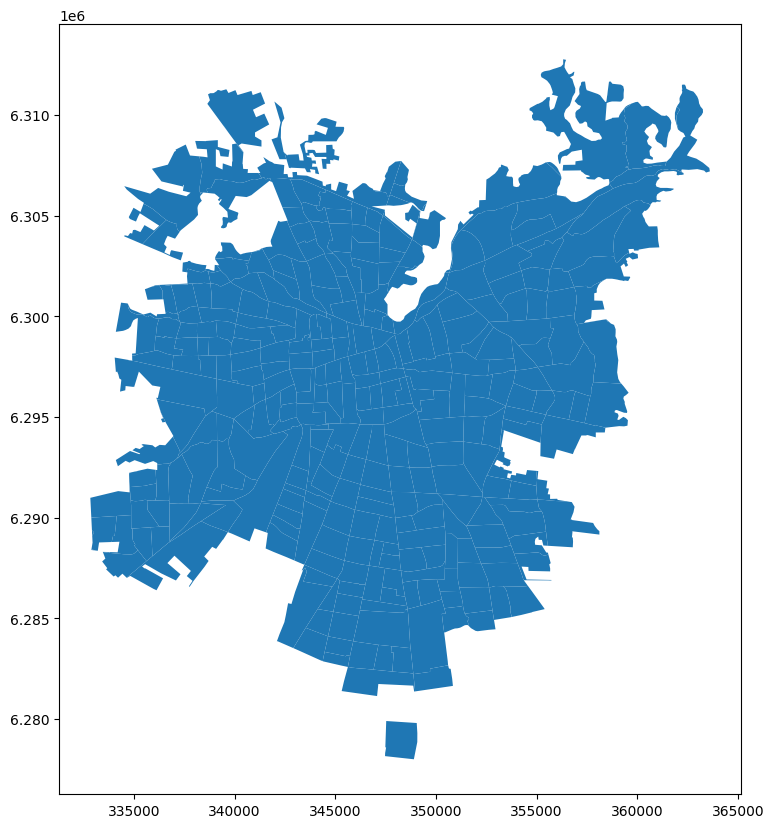

In [11]:
distritos_santiago_urbano.plot(figsize=(10,10))

In [12]:
distritos_santiago_urbano.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,...,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,...,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346788.392 6299461.792, 346943.942 6..."
1,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,...,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345961.610 6299612.269, 346298.704 6..."
2,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,...,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345650.511 6299703.570, 345809.442 6..."
3,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,...,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((345672.277 6298980.643, 345689.082 6..."
4,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,...,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((344041.982 6298246.207, 344940.918 6..."


Añadiendo métrica de diversidad de nivel socioeconómico.

Se utilizará el Índice de Herfindahl-Hirschman (HH), cuanto más bajo sea el índice de HH, mayor será la diversidad socioeconómica. Se calcula sumando los cuadrados de las proporciones de cada grupo socioeconómico en el área.

In [13]:
distritos_santiago_urbano["Nivel_Diversidad_de_Nivel_Socioeconomico"] = (distritos_santiago_urbano["E"]/distritos_santiago_urbano["ADIMARK_T"])**2 + (distritos_santiago_urbano["D"]/distritos_santiago_urbano["ADIMARK_T"])**2 + (distritos_santiago_urbano["C3"]/distritos_santiago_urbano["ADIMARK_T"])**2 + (distritos_santiago_urbano["C2"]/distritos_santiago_urbano["ADIMARK_T"])**2 + (distritos_santiago_urbano["ABC1"]/distritos_santiago_urbano["ADIMARK_T"])**2

In [14]:
distritos_santiago_urbano.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,...,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,Nivel_Diversidad_de_Nivel_Socioeconomico
0,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,...,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346788.392 6299461.792, 346943.942 6...",0.321390
1,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,...,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345961.610 6299612.269, 346298.704 6...",0.290373
2,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,...,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345650.511 6299703.570, 345809.442 6...",0.328787
3,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,...,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((345672.277 6298980.643, 345689.082 6...",0.329696
4,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,...,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((344041.982 6298246.207, 344940.918 6...",0.306708


<Axes: >

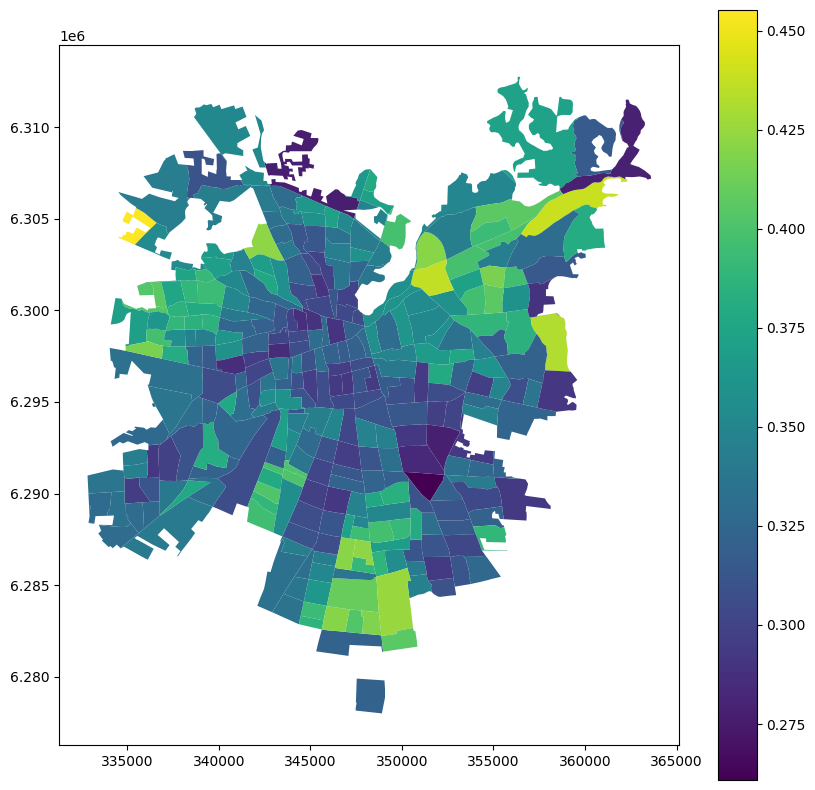

In [15]:
distritos_santiago_urbano.plot(column='Nivel_Diversidad_de_Nivel_Socioeconomico', figsize = (10,10), legend=True)

## Misión 2: Encuentre las estaciones de metro que tengan 3 o más distritos censales a menos de 100 metros de distancia.

Se leen los datos de las estaciones de metro

In [16]:
estaciones_metro = gpd.read_file('Data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

In [17]:
estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


Se revisa la proyección

In [18]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Se genera el buffer

In [19]:
# Generamos el buffer de las estaciones de metro
buffer_estaciones_metro = estaciones_metro.copy()
buffer_estaciones_metro.geometry = buffer_estaciones_metro.buffer(100)

In [20]:
buffer_estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,"POLYGON ((345817.366 6289105.444, 345816.885 6..."
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,"POLYGON ((344999.120 6298781.571, 344998.638 6..."
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,"POLYGON ((343908.803 6298622.125, 343908.321 6..."
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,"POLYGON ((347536.975 6287501.270, 347536.494 6..."
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,"POLYGON ((348382.582 6287378.409, 348382.100 6..."


In [21]:
distritos_metro = gpd.sjoin(distritos, buffer_estaciones_metro, predicate='intersects')

In [22]:
distritos_metro.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,18.44,"POLYGON ((347488.430 6298672.836, 347569.109 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
10,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Isidro,1310111.0,53.0,779.0,1892.0,...,14.81,"POLYGON ((346958.269 6298373.448, 347071.088 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",80,84,5,L5,BELLAS ARTES,Bellas Artes,347155.8810,6.299103e+06


In [23]:
# Se agrupan por estación
agrupando_distritos_estaciones = distritos_metro.groupby("ESTACION")
display(agrupando_distritos_estaciones.head(10))

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,18.44,"POLYGON ((347488.430 6298672.836, 347569.109 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
10,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Isidro,1310111.0,53.0,779.0,1892.0,...,14.81,"POLYGON ((346958.269 6298373.448, 347071.088 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",80,84,5,L5,BELLAS ARTES,Bellas Artes,347155.8810,6.299103e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Teniente Bello,1320115.0,133.0,848.0,1054.0,...,3.35,"POLYGON ((352221.696 6281031.729, 352739.578 6...",7,9,4,L4,LAS MERCEDES,Las Mercedes,353659.7532,6.280834e+06
319,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,San Carlos,1320108.0,92.0,3321.0,7148.0,...,2.49,"POLYGON ((353187.333 6283228.924, 354229.424 6...",82,86,4,L4,PROTECTORA DE LA INFANCIA,Protectora de la Infancia,353400.3951,6.282256e+06
328,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Padre Hurtado,1320117.0,182.0,2200.0,3323.0,...,5.83,"POLYGON ((353164.445 6283352.105, 353187.333 6...",82,86,4,L4,PROTECTORA DE LA INFANCIA,Protectora de la Infancia,353400.3951,6.282256e+06
320,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Sótero del Río,1320109.0,31.0,763.0,1730.0,...,2.78,"POLYGON ((354239.318 6283649.540, 354751.933 6...",9,11,4,L4,SOTERO DEL RIO,Sotero del Río,353150.0575,6.283649e+06


In [24]:
# Se filtran para obtener las estaciones que tienen 3 o más distritos a 100 metros
estaciones_filtradas = agrupando_distritos_estaciones.filter(lambda grupo: len(grupo) >= 3)
display(estaciones_filtradas.head(10))

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06
12,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Almagro,1310113.0,33.0,404.0,1037.0,...,14.31,"POLYGON ((346079.016 6298132.104, 346463.160 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06
11,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Universidad,1310112.0,35.0,429.0,880.0,...,14.05,"POLYGON ((346463.160 6298239.524, 346522.174 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06
12,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Almagro,1310113.0,33.0,404.0,1037.0,...,14.31,"POLYGON ((346079.016 6298132.104, 346463.160 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",61,64,2,COMB,CAL Y CANTO,Cal y Canto,346403.1922,6.299489e+06
82,Región Metropolitana De Santiago,131,Santiago,13108,Independencia,Independencia,1310801.0,76.0,978.0,1423.0,...,8.72,"POLYGON ((346040.296 6300810.440, 346090.704 6...",61,64,2,COMB,CAL Y CANTO,Cal y Canto,346403.1922,6.299489e+06
88,Región Metropolitana De Santiago,131,Santiago,13108,Independencia,Escuela de Medicina,1310807.0,6.0,91.0,212.0,...,7.54,"POLYGON ((346309.028 6301169.632, 346329.781 6...",61,64,2,COMB,CAL Y CANTO,Cal y Canto,346403.1922,6.299489e+06
263,Región Metropolitana De Santiago,131,Santiago,13127,Recoleta,Recoleta,1312701.0,72.0,452.0,454.0,...,9.36,"POLYGON ((346452.427 6300342.572, 346556.912 6...",61,64,2,COMB,CAL Y CANTO,Cal y Canto,346403.1922,6.299489e+06


In [25]:
# Para encontrar los distintos valores podemos usar el método value_counts en la columna "ESTACION"
estaciones_filtradas["ESTACION"].value_counts()

ESTACION
GRECIA                   5
PLAZA EGANA              4
ÑUÑOA                    4
SAN PABLO                4
PUDAHUEL                 4
FRANCISCO BILBAO         4
SANTA ROSA               4
ELISA CORREA             4
EL PARRON                4
LA CISTERNA              4
HOSPITAL EL PINO         4
OBSERVATORIO             4
LO MARTÏNEZ              4
ESTACION CENTRAL         4
LOS HEROES               4
CAL Y CANTO              4
BLANQUEADO               4
BIO BIO                  4
PLAZA DE MAIPU           3
EFE QUILICURA            3
CEMENTERIOS              3
EINSTEIN                 3
LOS PRESIDENTES          3
DEL SOL                  3
ZAPADORES                3
CARLOS VALDOVINOS        3
QUILIIN                  3
DORSAL                   3
MACUL                    3
BARRANCAS                3
ESTADIO NACIONAL         3
LA MONEDA                3
NEPTUNO                  3
LO VALLEDOR              3
SANTA ANA                3
REPUBLICA                3
UNION LATINOAMERICA

## Misión 3: Haga un ranking de las comunas con más estaciones de metro. Visualice esta información mediante una tabla y un mapa.

In [26]:
estaciones_contenidas_en_distritos = gpd.sjoin(estaciones_metro, distritos, how="inner", predicate="within")

In [27]:
estaciones_contenidas_en_distritos.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry,index_right,NOM_REG,...,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444),91,Región Metropolitana De Santiago,...,1310903.0,68.0,1015.0,1768.0,1589.0,403.0,4843.0,1665542.63,29.08,4.97
40,43,2,L2,LO OVALLE,Lo Ovalle,345942.8141,6.290139e+06,POINT (345942.814 6290138.514),91,Región Metropolitana De Santiago,...,1310903.0,68.0,1015.0,1768.0,1589.0,403.0,4843.0,1665542.63,29.08,4.97
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571),3,Región Metropolitana De Santiago,...,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25
49,52,1,L1,REPUBLICA,República,345054.7146,6.297837e+06,POINT (345045.848 6297833.614),3,Región Metropolitana De Santiago,...,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125),28,Región Metropolitana De Santiago,...,1310129.0,13.0,58.0,81.0,41.0,5.0,198.0,732908.67,2.70,5.61


In [28]:
df_comunas_estaciones = estaciones_contenidas_en_distritos.groupby("NOM_COM", as_index=False).size()
display(df_comunas_estaciones.head(10))

,NOM_COM,size
0,Cerrillos,2
1,Conchalí,3
2,El Bosque,3
3,Estación Central,3
4,Huechuraba,1
5,Independencia,2
6,La Cisterna,4
7,La Florida,9
8,La Granja,2
9,La Reina,5


In [29]:
df_comunas_estaciones.columns = ["NOM_COM", "N_ESTACIONES"]
display(df_comunas_estaciones.head(10))

,NOM_COM,N_ESTACIONES
0,Cerrillos,2
1,Conchalí,3
2,El Bosque,3
3,Estación Central,3
4,Huechuraba,1
5,Independencia,2
6,La Cisterna,4
7,La Florida,9
8,La Granja,2
9,La Reina,5


In [30]:
df_comunas_estaciones_ranking = df_comunas_estaciones.sort_values(by=["N_ESTACIONES"], ascending=False)

In [31]:
df_comunas_estaciones_ranking.head()

,NOM_COM,N_ESTACIONES
24,Santiago,22
7,La Florida,9
16,Providencia,8
10,Las Condes,8
25,Ñuñoa,7


Agrego la información del dataframe de las estaciones por comuna al Geodataframe de distritos.

In [32]:
distritos_copia = distritos.copy()
distritos_con_numero_estaciones = distritos_copia.merge(df_comunas_estaciones)

In [33]:
distritos_con_numero_estaciones.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,N_ESTACIONES
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",22
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",22
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",22
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",22
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",22


Se genera el mapa solicitado

<Axes: >

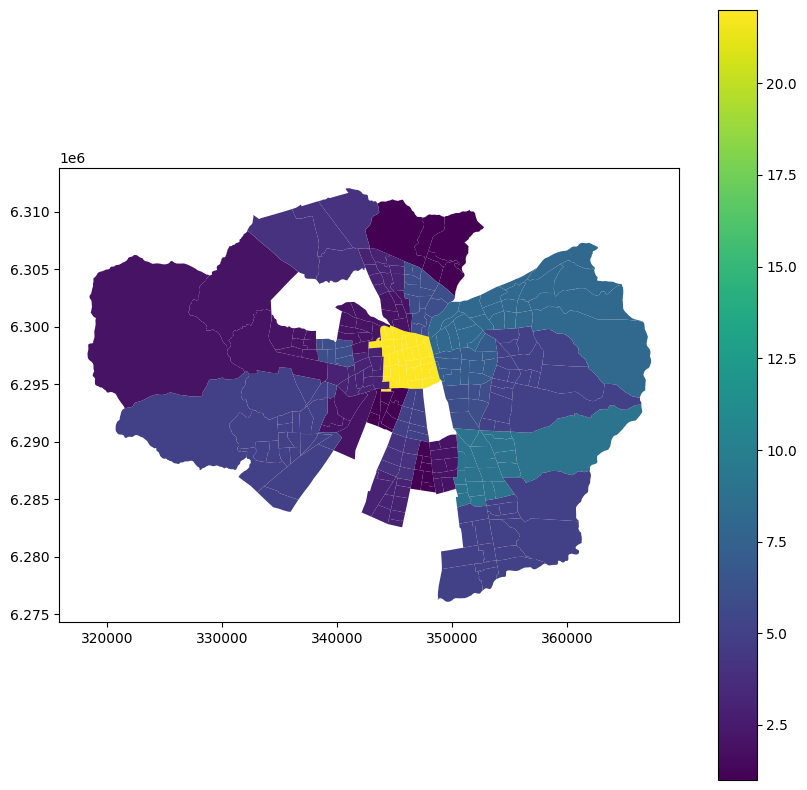

In [34]:
distritos_con_numero_estaciones.plot(column='N_ESTACIONES', figsize = (10,10), legend=True)

<Axes: >

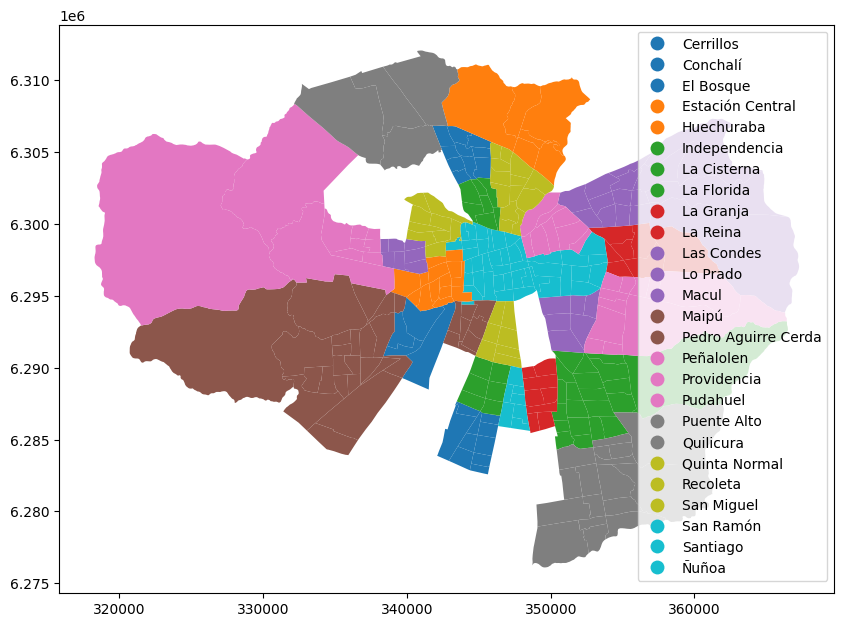

In [35]:
distritos_con_numero_estaciones.plot(column='NOM_COM', figsize = (10,10), legend=True)